# Assignment 1
## Problem 1 - System Identification

In [42]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from src.utils.plotting import init_plot_style
from src.models.simple_mlp import SimpleMLP
#from src.models.poly_model import poly_Model

%pylab

#init_plot_style()
%matplotlib inline
data_dir='../../data/csv/1_1_system_identification/'


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


First, let's take a look at the training and test data.

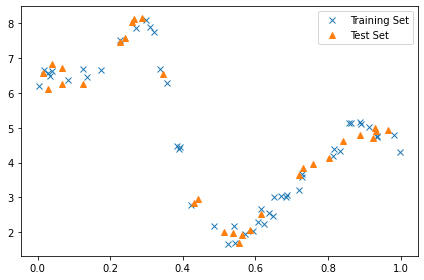

In [14]:
training_set = pd.read_csv(data_dir + 'training-set.csv').to_numpy()
x_train, y_train = training_set[:,0], training_set[:,1]

test_set = pd.read_csv(data_dir + 'test-set.csv').to_numpy()
x_test, y_test = test_set[:,0], test_set[:,1]

plt.close('all')
plt.figure()
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.legend()
plt.tight_layout()


Run your experiments from here on!

Best degree of training =  25
Best degree of testing =  20
MSE of the training =  0.023188567579180065
MSE of the test =  0.045655512936282346


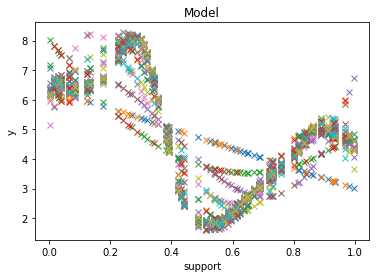

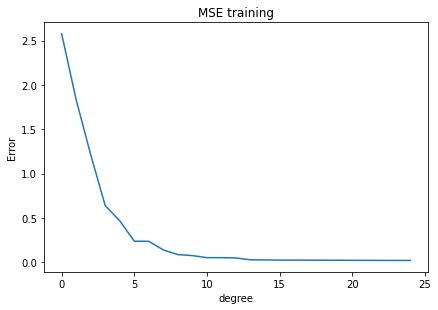

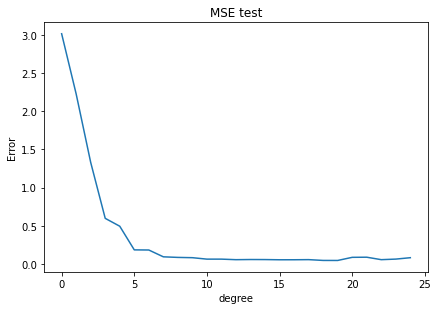

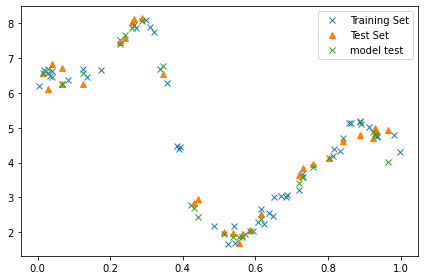

In [43]:
#Assignment 1.a
#polynomial model

#function for the matrix X


def design_matrix(x, degree):
    rows = len(x)
    X = np.zeros((rows, degree+1))
    for i in range(0,rows):
        for j in range(0,degree+1):
            X[i][j] = x[i]**j
    
    return X

#function to train our model and get the alpha values
def train_model(x, y, degree):
        
        X = design_matrix(x, degree)
        
        alpha = np.dot(np.linalg.pinv(X), y)
        
        return alpha, X
    
#function to compute the error 
def error(x, y, alpha, degree):
    X = design_matrix(x, degree)
    y_pred = np.dot(X, alpha)
    err = (np.mean((y_pred-y)**2))
    
    plt.plot(x, y_pred, 'x')
    plt.title('Model')
    plt.xlabel('support')
    plt.ylabel('y')
    
    return err, y_pred


max_degree = 25
mse_train = np.zeros(max_degree)
mse_val = np.zeros(max_degree)
mse_test = np.zeros(max_degree)
alpha_list = np.zeros(max_degree, dtype=object)
degrees = np.arange(max_degree) + 1

for i in range(max_degree):
    
    alpha, X = train_model(x_train, y_train, degrees[i])
    
    err_train, y_pred_train = error(x_train, y_train, alpha, degrees[i])
    err_test, y_pred_test = error(x_test, y_test, alpha, degrees[i])
    
    mse_train[i] = err_train
    mse_test[i] = err_test
    alpha_list[i] = alpha
    
best = np.argmin(mse_test)
best_train = np.argmin(mse_train)
best_degree_train = degrees[best_train]
best_degree = degrees[best]
best_alpha = alpha_list[best]
print('Best degree of training = ', best_degree_train)
print('Best degree of testing = ', best_degree)
print('MSE of the training = ', mse_train[best])
print('MSE of the test = ', mse_test[best])

plt.figure()
plt.plot(mse_train)
plt.tight_layout()
plt.title('MSE training')
plt.xlabel('degree')
plt.ylabel('Error')
#plt.savefig('data/figures/mse_train.jpg')

plt.figure()
plt.plot(mse_test)
plt.tight_layout()
plt.title('MSE test')
plt.xlabel('degree')
plt.ylabel('Error')
#plt.savefig('data/figures/mse_test.jpg')

plt.figure()
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.plot(x_test, y_pred_test, 'x', label='model test')
plt.legend()
plt.tight_layout()
#plt.savefig('data/figures/task_1_curves.jpg')



We do the same as before just with a validation set!

Best degree of the test set=  15
Best degree of the val set=  9


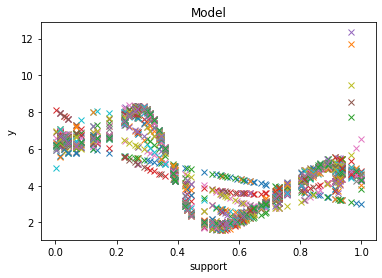

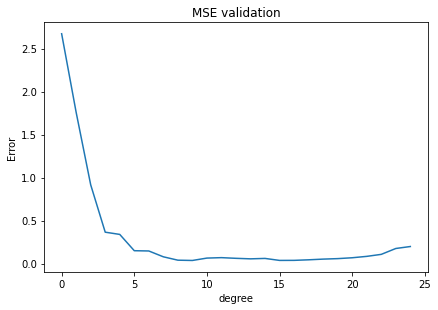

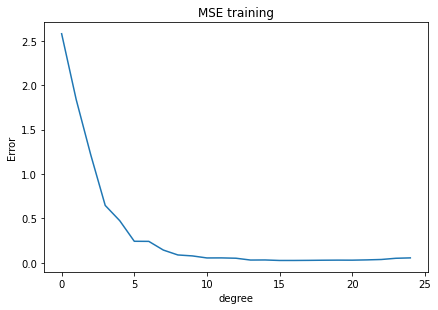

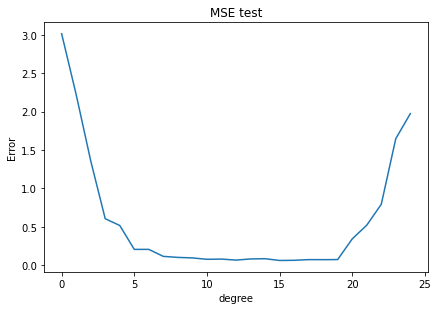

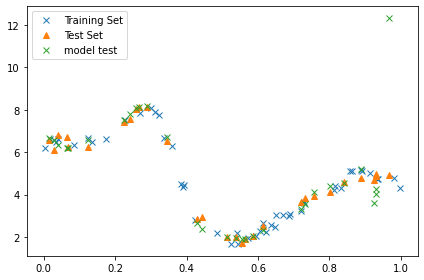

In [28]:
#1.b The same as befor but now we split the training set into a new training set and a validation set
max_degree = 25
mse_train = np.zeros(max_degree)
mse_val = np.zeros(max_degree)
mse_test = np.zeros(max_degree)
alpha_list = np.zeros(max_degree, dtype=object)
degrees = np.arange(max_degree) + 1
value = 1/5
y_val = y_train[0:round(len(y_train)*value)]
y_train_new = y_train[round(len(y_train)*value):len(y_train)+1]
x_val = x_train[0:round(len(x_train)*value)]
x_train_new = x_train[round(len(x_train)*value):len(x_train)+1]

for i in range(max_degree):
    
    alpha, X = train_model(x_train_new, y_train_new, degrees[i])
    
    err_train, y_pred_train = error(x_train, y_train, alpha, degrees[i])
    err_val, y_pred_val = error(x_val, y_val, alpha, degrees[i])
    err_test, y_pred_test = error(x_test, y_test, alpha, degrees[i])
    
    mse_train[i] = err_train
    mse_val[i] = err_val
    mse_test[i] = err_test
    alpha_list[i] = alpha

best = np.argmin(mse_val)
best_test = np.argmin(mse_test)
best_val = np.argmin(mse_val)
best_degree = degrees[best]
best_alpha = alpha_list[best]

print('Best degree of the test set= ',best_test)
print('Best degree of the val set= ',best_val)


plt.figure()
plt.plot(mse_val)
plt.tight_layout()
plt.title('MSE validation')
plt.xlabel('degree')
plt.ylabel('Error')
#plt.savefig('data/figures/mse_b_val.jpg')

plt.figure()
plt.plot(mse_train)
plt.tight_layout()
plt.title('MSE training')
plt.xlabel('degree')
plt.ylabel('Error')
#plt.savefig('data/figures/mse_b_train.jpg')

plt.figure()
plt.plot(mse_test)
plt.tight_layout()
plt.title('MSE test')
plt.xlabel('degree')
plt.ylabel('Error')
#plt.savefig('data/figures/mse_b_test.jpg')

plt.figure()
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.plot(x_test, y_pred_test, 'x', label='model test')
plt.legend()
plt.tight_layout()
#plt.savefig('data/figures/task_1_b_curves.jpg')

0.0924423421064692


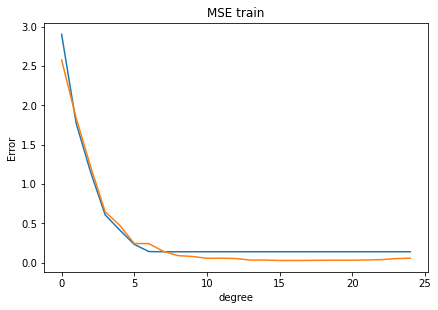

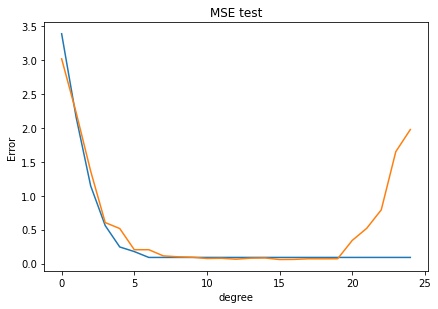

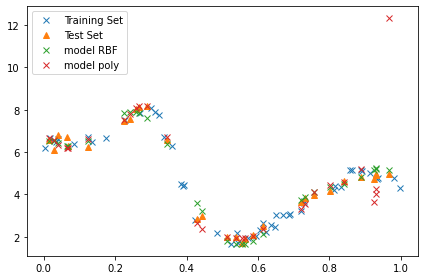

In [25]:
#1.c now we use a RBF model

#equally space the centers and determine the width
def get_center_and_width(n_center):
    centers = np.linspace(0, 1, n_center) 
    width = 1

    return centers, width

# design matrix X
def design_matrix_rbf(x,centers,width):
    
    X_rbf = np.zeros((len(x), len(centers)+1))

    for i in range(0,len(x)):
        for j in range(0,len(centers)+1):
            if j == 0:
                X_rbf[i][j] = 1
            else:
                X_rbf[i][j] = np.exp(-(x[i]-centers[j-1])**2/(2*width**2))


    return X_rbf

# train our model and get the alpha values
def train_model_rbf(x,y,n_center):
    
    c,w = get_center_and_width(n_center)
    X_rbf = design_matrix_rbf(x,c,w)
    alpha_rbf = np.dot(np.linalg.pinv(X_rbf), y)
    
    return alpha_rbf, X_rbf


# compute the error
def error_rbf(x, y, alpha_rbf, n_center):
    
    c,s = get_center_and_width(n_center)
    X_rbf = design_matrix_rbf(x,c,s)
    y_pred_rbf = np.dot(X_rbf, alpha_rbf)
    
    err_rbf = (np.mean((y_pred_rbf-y)**2))


    return err_rbf, y_pred_rbf
    

number_of_centers = 25
mse_train_rbf = np.zeros(number_of_centers)
mse_val_rbf = np.zeros(number_of_centers)
mse_test_rbf = np.zeros(number_of_centers)
alpha_list_rbf = np.zeros(number_of_centers, dtype=object)
n_centers = np.arange(number_of_centers) + 1



for i in range(number_of_centers):
    alpha_rbf, X_rbf = train_model_rbf(x_train, y_train, n_centers[i])
    
    err_train_rbf, y_pred_train_rbf = error_rbf(x_train, y_train, alpha_rbf, n_centers[i])
    err_test_rbf, y_pred_test_rbf = error_rbf(x_test, y_test, alpha_rbf, n_centers[i])
    
    mse_train_rbf[i] = err_train_rbf
    mse_test_rbf[i] = err_test_rbf
    alpha_list_rbf[i] = alpha_rbf
    
best_rbf = np.argmin(mse_test_rbf)
best_n_center = n_centers[best_rbf]
best_alpha_rbf = alpha_list_rbf[best_rbf]
print(mse_test_rbf[best_rbf])


plt.figure()
plt.plot(mse_train_rbf)
plt.plot(mse_train)
plt.tight_layout()
plt.title('MSE train')
plt.xlabel('degree')
plt.ylabel('Error')
#plt.savefig('data/figures/task_1_c_train.jpg')

plt.figure()
plt.plot(mse_test_rbf)
plt.plot(mse_test)
plt.tight_layout()
plt.title('MSE test')
plt.xlabel('degree')
plt.ylabel('Error')
#plt.savefig('data/figures/task_1_c_test.jpg')

plt.figure()
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.plot(x_test, y_pred_test_rbf, 'x', label='model RBF')
plt.plot(x_test, y_pred_test, 'x', label='model poly')
plt.legend()
plt.tight_layout()
#plt.savefig('data/figures/task_1_c_curves.jpg')

    

In [160]:
#1.d gradient descent





Epoch 0 training loss is 8.38
Epoch 50 training loss is 0.07
Epoch 100 training loss is 0.12
Epoch 150 training loss is 0.05
Epoch 200 training loss is 0.08
Epoch 250 training loss is 0.03
Training MSE is 0.05oss is 0.05
Test MSE is 8.52


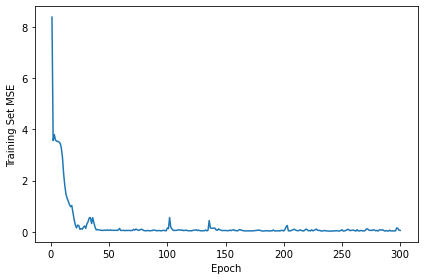

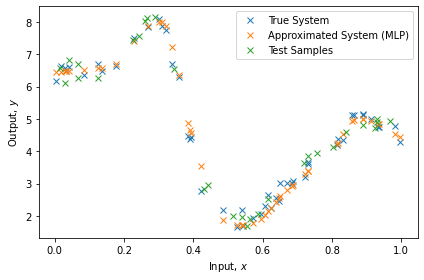

In [18]:
#1.e feed forward neural Network

# create and fit an instance of our simple MLP model given our training data
hidden_size=32
mlp_model = SimpleMLP(hidden_size=hidden_size)
loss_list = mlp_model.fit(x_train, y_train)

# plot the evolution of the training MSE
plt.figure()
plt.plot(list(range(1, 1 + len(loss_list))), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Training Set MSE')
plt.tight_layout()

# compute the approximated system behavior and the prediction for our test set
approx_output = mlp_model.predict(x_train)
y_pred = mlp_model.predict(x_test)

print(f'Training MSE is {loss_list[-1]:.2f}')
print(f'Test MSE is {np.mean((y_test - y_pred)**2):.2f}')

# plot the true and approximated systems with the test samples
plt.figure()
plt.plot(x_train, y_train, 'x', label='True System')
plt.plot(x_train, approx_output, 'x', label='Approximated System (MLP)')
plt.plot(x_test, y_test, 'x', label='Test Samples')
plt.xlabel('Input, $x$')
plt.ylabel('Output, $y$')
plt.legend()
plt.tight_layout()
#plt.savefig('data/figures/1_e_{}_num_lay4_relu.jpg'.format(hidden_size))

save_model = mlp_model.save('src/models/MLP')


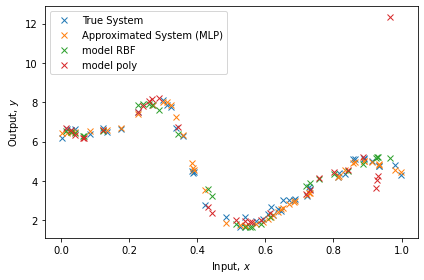

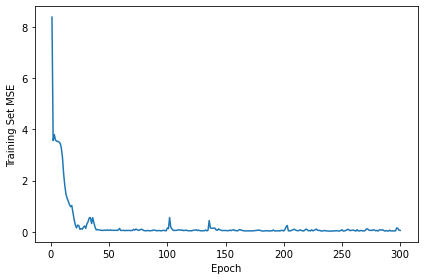

In [27]:
MLP_model = mlp_model.load('src/models/MLP')


plt.figure()
plt.plot(x_train, y_train, 'x', label='True System')
plt.plot(x_train, approx_output, 'x', label='Approximated System (MLP)')
#plt.plot(x_test, y_test, 'x', label='Test Samples')
plt.plot(x_test, y_pred_test_rbf, 'x', label='model RBF')
plt.plot(x_test, y_pred_test, 'x', label='model poly')
plt.xlabel('Input, $x$')
plt.ylabel('Output, $y$')
plt.legend()
plt.tight_layout()
#plt.savefig('data/figures/task1_e_allmodels.jpg')

print(f'Test MSE MLP model is {np.mean((y_test - y_pred)**2):.2f}')